# Fitting observed data to a weighted sum of two `scipy.stats` probability density functions

When a single probability density function does not provide a good fit of an empirical data distribution we can consider fitting the data to a combination of pdfs. This notebook shows how to fit data to a sum of pdfs from `scipy.stats` using `scipy.optimize.curve_fit`.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import expon

### Generating the observational data

Here are the distributions we are using to generate observations.

In [2]:
x = np.arange(0,201)
w = 0.25
scale1_ = 5
scale2_ = 20
expon1 = expon.pdf(x, scale=scale1_)
expon2 = expon.pdf(x, scale=scale2_)

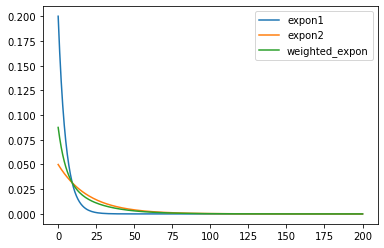

In [3]:
plt.plot(x, expon1, label='expon1')
plt.plot(x, expon2, label='expon2')
weighted_expon = expon1*w + expon2*(1-w)
plt.plot(x, weighted_expon, label='weighted_expon')
_ = plt.legend()

Generate random samples.

In [4]:
size = 300
rvs1 = expon.rvs(size=int(size*w), scale=scale1_)
rvs2 = expon.rvs(size=int(size*(1-w)), scale=scale2_)
rvs_weighted = np.append(
    rvs1,
    rvs2
)

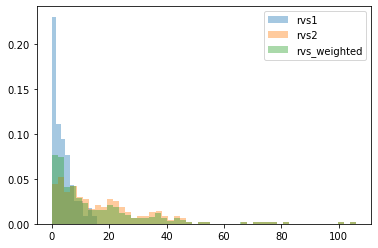

In [5]:
nbins=10
opacity=0.4

plt.hist(rvs1, label='rvs1', density=True, bins=10, alpha=opacity)
plt.hist(rvs2, label='rvs2', density=True, bins=50 , alpha=opacity)
plt.hist(rvs_weighted, label='rvs_weighted', density=True, bins=50, alpha=opacity)
_ = plt.legend()

In [6]:
count, bin_edges = np.histogram(rvs_weighted, bins=100, density=True)
bin_centres = (bin_edges[0:-1] + bin_edges[1:])/2

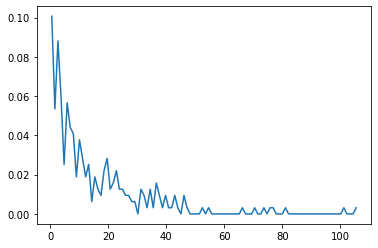

In [7]:
_ = plt.plot(bin_centres, count)

Fitting the random observations.  Since we don't know the data generation process we would need to do some exploration to figure out what distributions best fit the data.

In [8]:
from scipy.optimize import curve_fit

In [9]:
def exp_sum_stats(x, w, scale1, scale2):
    return w*expon.pdf(x, scale=scale1) + (1-w)*expon.pdf(x, scale=scale2)

params, cov = curve_fit(exp_sum_stats, xdata=bin_centres, ydata=count, bounds=((0,0,0), (1.0, 100, 1000)))
print('w: {:.2f}; scale1: {:.2f}; scale2: {:.2f}'.format(*params))
params_sd = np.sqrt(np.diag(cov))
print('sd w: {:.2f}; sd scale1: {:.2f}; sd scale2: {:.2f}'.format(*params_sd))

w: 0.21; scale1: 3.51; scale2: 17.88
sd w: 0.10; sd scale1: 1.22; sd scale2: 2.81


In [10]:
y = exp_sum_stats(x, *params)

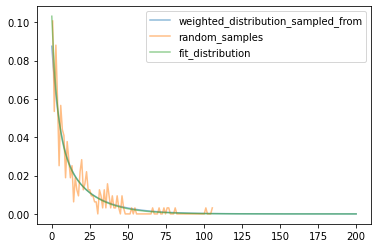

In [11]:
plt.plot(x, weighted_expon, label='weighted_distribution_sampled_from', alpha=0.5)
plt.plot(bin_centres, count, label='random_samples', alpha=0.5)
plt.plot(x, y, label='fit_distribution', alpha=0.5)
_ = plt.legend()